In [11]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [6]:
kaggle competitions download -c sf-dst-scoring


SyntaxError: invalid syntax (<ipython-input-6-8708193e25bf>, line 1)

In [1]:
kaggle competitions download -c sf-dst-scoring

SyntaxError: invalid syntax (<ipython-input-1-8708193e25bf>, line 1)

In [12]:
df = pd.read_csv('train_draft.csv')

In [13]:
df.describe()

,client_id,age,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,2.000339,1.575509,2.496280,41099.775417,0.126994
std,31841.921168,11.520378,0.804272,0.371087,2.252073,0.527631,0.689818,46166.322400,0.332968
min,1.000000,21.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1000.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,20000.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,1.000000,2.000000,3.000000,30000.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,3.000000,2.000000,3.000000,48000.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,53.000000,3.000000,3.000000,1000000.000000,1.000000


In [14]:
df

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,M,62,Y,Y,0,0,1,1,2,18000,N,0
1,63161,SCH,F,59,N,N,0,0,3,2,3,19000,N,0
2,25887,SCH,M,25,Y,N,2,0,1,1,2,30000,Y,0
3,16222,SCH,F,53,N,N,0,0,2,2,3,10000,N,0
4,101655,GRD,M,48,N,N,0,1,1,2,3,30000,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,GRD,F,45,N,N,0,0,3,1,2,17000,N,0
73795,76821,SCH,M,41,Y,Y,0,0,1,2,2,70000,N,0
73796,103695,SCH,M,31,N,N,0,0,4,2,3,45000,N,0
73797,861,SCH,F,29,N,N,0,1,3,1,3,13000,N,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   client_id         73799 non-null  int64 
 1   education         73492 non-null  object
 2   sex               73799 non-null  object
 3   age               73799 non-null  int64 
 4   car               73799 non-null  object
 5   car_type          73799 non-null  object
 6   decline_app_cnt   73799 non-null  int64 
 7   good_work         73799 non-null  int64 
 8   bki_request_cnt   73799 non-null  int64 
 9   home_address      73799 non-null  int64 
 10  work_address      73799 non-null  int64 
 11  income            73799 non-null  int64 
 12  foreign_passport  73799 non-null  object
 13  default           73799 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 7.9+ MB


In [16]:
df.isna().sum()

client_id             0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
bki_request_cnt       0
home_address          0
work_address          0
income                0
foreign_passport      0
default               0
dtype: int64

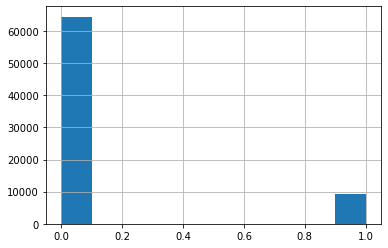

In [17]:
df['default'].hist()

In [18]:
df['education'] = df['education'].astype(str).apply(
    lambda x: None if x.strip() == ''else x)

In [19]:
df['education'].value_counts()

SCH    38860
GRD    23365
UGR     9816
PGR     1257
nan      307
ACD      194
Name: education, dtype: int64

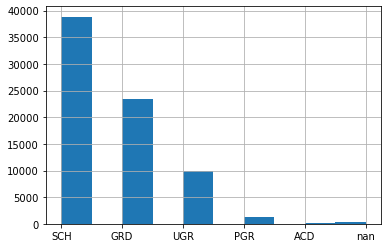

In [20]:
df['education'].hist()

In [21]:
df['education'] = df['education'].apply(lambda x:'SCH' if x == 'nan' else x)

In [22]:
df_nums = df[['age','decline_app_cnt','bki_request_cnt','income','default']]

num_cols = ['age','decline_app_cnt','bki_request_cnt','income']

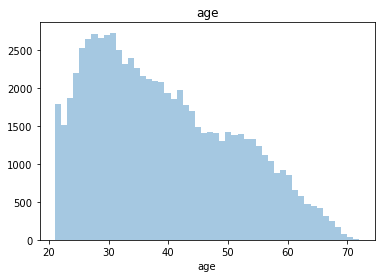

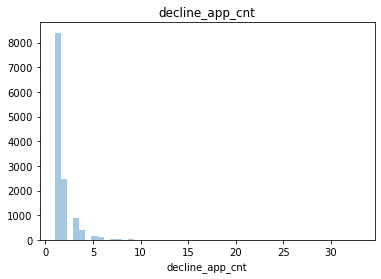

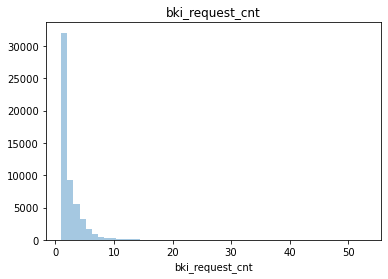

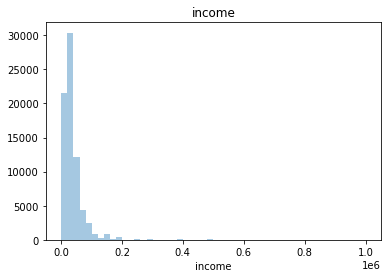

In [23]:
for i in num_cols:
    plt.figure()
    sns.distplot(df_nums[i][df_nums[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

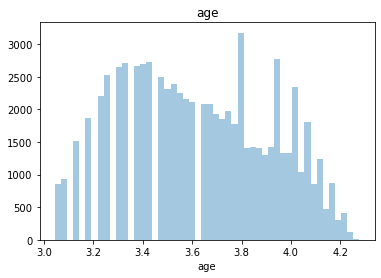

C:\Users\Vetak8\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


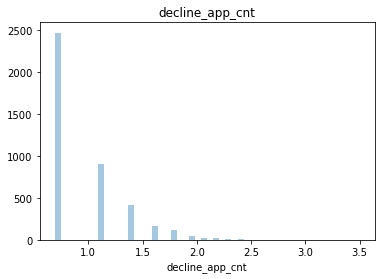

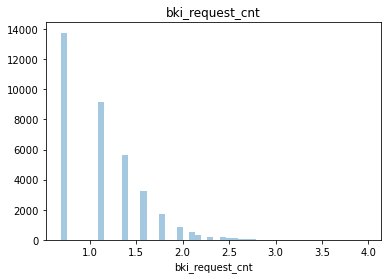

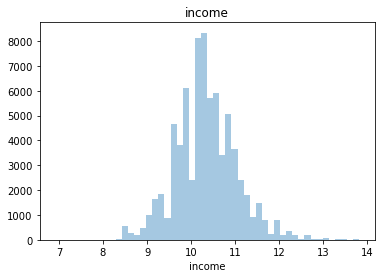

In [24]:
for i in num_cols:
    plt.figure()
    sns.distplot(np.log(df_nums[i])[np.log(df_nums[i]) > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

In [25]:
# plt. figure(figsize=[15, 20])

# i = 1
# y, hue = 'proportion', 'default'
# for f in num_cols:
#     plt.subplot(5, 2, i)
#     df[[f, 'default']]\
#         .value_counts(normalize=True)\
#         .rename(y)\
#         .reset_index()\
#         .pipe((sns.boxplot, 'data'), x=f, y='proportion', hue='default', alpha=0.8)
#     plt.title('Proportion of {} by default'.format(f))
#     i += 1
# plt.tight_layuot()
# plt.show

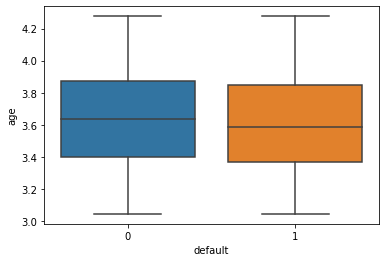

In [26]:
sns.boxplot(y= np.log(df_nums['age']),x=df_nums['default'])

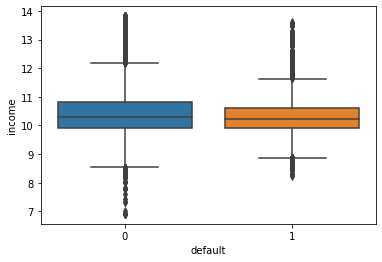

In [27]:
sns.boxplot(y= np.log(df_nums['income']),x=df_nums['default'])

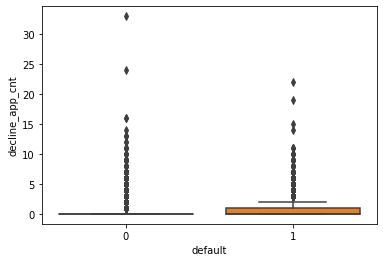

In [28]:
sns.boxplot(y= df_nums['decline_app_cnt'],x=df_nums['default'])

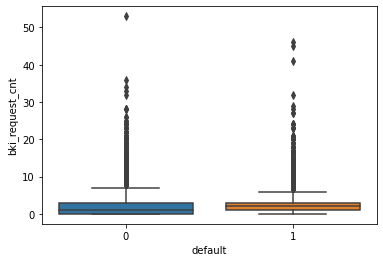

In [29]:
sns.boxplot(y= df_nums['bki_request_cnt'],x=df_nums['default'])

<ipython-input-30-f9d8858e059a>:1: RuntimeWarning: divide by zero encountered in log
  sns.heatmap(np.log(df_nums[num_cols]).corr().abs(), vmin=0, vmax=1)
<ipython-input-30-f9d8858e059a>:2: RuntimeWarning: divide by zero encountered in log
  display(np.log(df_nums[num_cols]).corr().abs())


,age,decline_app_cnt,bki_request_cnt,income
age,1.000000,0.109898,0.059753,0.091870
decline_app_cnt,0.109898,1.000000,0.112057,0.000153
bki_request_cnt,0.059753,0.112057,1.000000,0.108082
income,0.091870,0.000153,0.108082,1.000000


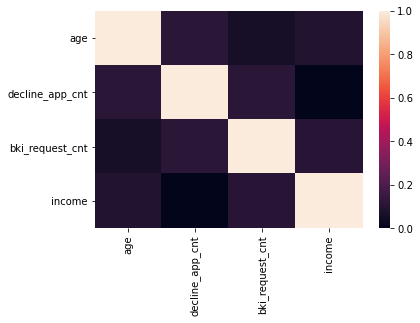

In [30]:
sns.heatmap(np.log(df_nums[num_cols]).corr().abs(), vmin=0, vmax=1)
display(np.log(df_nums[num_cols]).corr().abs())

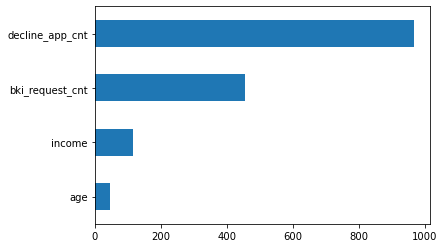

In [31]:
imp_num = Series(f_classif(df_nums[num_cols], df_nums['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [32]:
bin_cols = ['sex','car','car_type']

In [33]:
cat_cols = ['education','home_address','work_address']

In [34]:
df_train = df.copy()

In [35]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    df_train[column] = label_encoder.fit_transform(df_train[column])
    
# убедимся в преобразовании    
df_train.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,bki_request_cnt,home_address,work_address,income,foreign_passport,default
0,25905,SCH,1,62,1,1,0,0,1,1,2,18000,N,0
1,63161,SCH,0,59,0,0,0,0,3,2,3,19000,N,0
2,25887,SCH,1,25,1,0,2,0,1,1,2,30000,Y,0
3,16222,SCH,0,53,0,0,0,0,2,2,3,10000,N,0
4,101655,GRD,1,48,0,0,0,1,1,2,3,30000,Y,0


In [36]:
df_train['education'] = label_encoder.fit_transform(df_train['education'])

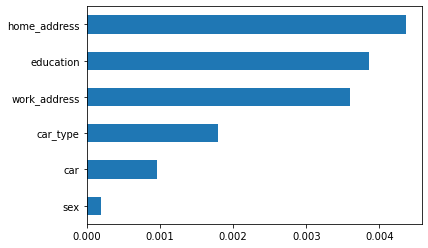

In [37]:
imp_cat = Series(mutual_info_classif(df_train[bin_cols + cat_cols], df_train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

In [38]:
X_cat = OneHotEncoder(sparse = False).fit_transform(df_train[cat_cols].values)

In [39]:
# Стандартизация числовых переменных

X_num = StandardScaler().fit_transform(df_train[num_cols].values)


In [40]:
X_num

array([[ 1.97211528e+00, -3.42857656e-01, -4.44188844e-01,
        -5.00363267e-01],
       [ 1.71170539e+00, -3.42857656e-01,  4.43888001e-01,
        -4.78702309e-01],
       [-1.23960668e+00,  2.14387966e+00, -4.44188844e-01,
        -2.40431770e-01],
       ...,
       [-7.18786904e-01, -3.42857656e-01,  8.87926424e-01,
         8.44826013e-02],
       [-8.92393496e-01, -3.42857656e-01,  4.43888001e-01,
        -6.08668058e-01],
       [-4.58377015e-01, -3.42857656e-01, -1.50421558e-04,
        -3.48736561e-01]])

In [41]:
# Объединяем

X = np.hstack([X_num, df_train[bin_cols].values, X_cat])
Y = df_train['default'].values

In [42]:
X.shape

(73799, 18)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)


In [44]:
lgr = LogisticRegression(C=7.74263683)
lgr.fit(X_train,y_train)

LogisticRegression(C=7.74263683)

In [45]:
y_pred = lgr.predict(X_test)

In [46]:
y_pred_proba = lgr.predict_proba(X_test)
y_pred_proba=y_pred_proba[:,1]

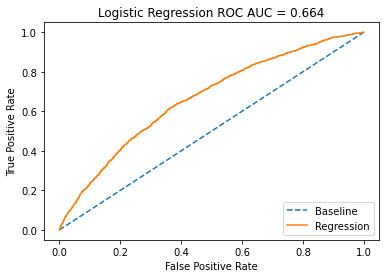

In [47]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [48]:
roc_curve(y_test, y_pred_proba)

(array([0.00000000e+00, 7.73215805e-05, 7.73215805e-05, ...,
        9.96984458e-01, 9.96984458e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00109469, ..., 0.99945265, 1.        ,
        1.        ]),
 array([1.94332746, 0.94332746, 0.89325558, ..., 0.02591216, 0.02565599,
        0.00661061]))

In [49]:
# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

C:\Users\Vetak8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Vetak8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vetak8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vetak8\anaconda3\lib\site-packages\sklearn\l

C:\Users\Vetak8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Vetak8\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vetak8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Vetak8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Vetak8\anaconda3\lib\site-packages\sklearn\model_selecti

Лучшее Penalty: l2
Лучшее C: 1.0


C:\Users\Vetak8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
best_model.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [51]:
C

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])